**RQ1: How much does the inflation rate influence the size and performance of the model?**

Experimental Setup:

10 (will be 30 for the final version) Monte Carlo Runs for 18 Datasets with the fixed configurations:


config_all = {

    'pop_size': 50, #will be 200 for final version
    'n_iter': 300,  #will be 2000 for final version
    'elitism': True,
    'n_elites': 1,
    'init_depth': 6,
    'initializer': 'rhh',
    'tournament_size': 2,
    'prob_const': 0.2,
    'tree_functions': ['add', 'subtract', 'multiply', 'divide'],
    'tree_constants': np.linspace(-10, 10, num=201).round(1).tolist(),
    'fitness_function': sigmoid_rmse,
    'minimization' : True,
    'seed': None, #based on monte_carlo_run
    'log_path' : None, #based on monte_carlo_run
    'verbose': False,
    'log_level': 0,
    'test_elite': True

}

basic_config_slim= {

    'slim_version': None, #for all versions
    'ms_lower': 0,
    'ms_upper': 1,
    'p_inflate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'reconstruct': True,
    'copy_parent': True

}


In [ ]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
from analysis import *

settings_dict = {'': 'name', 'fitness': 'config.fitness_function', 'ms': 'config.ms_upper'}
ana = Analysis('RQ1Fitness', settings_dict)
ana.results = ana.results[ana.results['config.fitness_function'] != 'roc_auc']

Visualization for the Median Test Error (RMSE) of the Final Individual for different Inflation Rates

<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>

In [1]:
plot_by_p_inflate2(ana.results, 'test.rmse') #[ana.results['config.ms_upper'] == 5]

NameError: name 'plot_by_p_inflate2' is not defined

In [ ]:
def get_best_config(dataset_name, fitness_function, metric):
    if fitness_function == 'sigmoid_rmse' or fitness_function == 'weighted_sigmoid_rmse':
        best_config = (
                    ana.results[
                        (ana.results['dataset_name'] == dataset_name) &
                        (ana.results['config.fitness_function'] == fitness_function)
                    ]
                    .groupby(['config_id', 'run_id'])[metric]
                    .median()  # Step 2: median rmse per run
                    .reset_index()
                    .groupby('config_id')[metric]
                    .min()     # Step 3: min of median rmses per config
                    .reset_index()
                    .sort_values(by=metric)  # Optional: to see best one first
                    .iloc[0]  # Step 4: get the best one
                )
    else:
        best_config = (
                    ana.results[
                        (ana.results['dataset_name'] == dataset_name) &
                        (ana.results['config.fitness_function'] == fitness_function)
                    ]
                    .groupby(['config_id', 'run_id'])[metric]
                    .median()  # Step 2: median rmse per run
                    .reset_index()
                    .groupby('config_id')[metric]
                    .min()     # Step 3: min of median rmses per config
                    .reset_index()
                    .sort_values(by=metric, ascending = False)  # Optional: to see best one first
                    .iloc[0]  # Step 4: get the best one
                )
        
    return best_config

In [ ]:
best_configs = []
for dataset in ana.results['dataset_name'].unique():
    for ff in ana.results['config.fitness_function'].unique():
        
        if ff == 'sigmoid_rmse':
            best_config = get_best_config(dataset, ff, 'test.rmse')
            best_configs.append([dataset, ff, best_config['config_id']])
        
        elif ff == 'weighted_sigmoid_rmse':
            best_config = get_best_config(dataset, ff, 'test.rmse')############
            best_configs.append([dataset, ff, best_config['config_id']])
        
        elif ff == 'accuracy':
            best_config = get_best_config(dataset, ff, 'test.accuracy')
            best_configs.append([dataset, ff, best_config['config_id']])
        
        elif ff == 'f1_score':
            best_config = get_best_config(dataset, ff, 'test.f1_score')
            best_configs.append([dataset, ff, best_config['config_id']])

        else:
            raise ValueError(f"Unknown fitness function: {ff}")

best_configs_df = pd.DataFrame(best_configs, columns=['dataset_name', 'fitness_function', 'config_id'])

    

In [ ]:
best_configs_df

,dataset_name,fitness_function,config_id
0,auction,sigmoid_rmse,2.0
1,auction,weighted_sigmoid_rmse,7.0
2,auction,accuracy,9.0
3,auction,f1_score,20.0
4,autism,sigmoid_rmse,4.0
5,autism,weighted_sigmoid_rmse,8.0
6,autism,accuracy,12.0
7,autism,f1_score,20.0
8,biomed,sigmoid_rmse,1.0
9,biomed,weighted_sigmoid_rmse,5.0


In [ ]:
best = pd.merge(ana.results, best_configs_df, on=['dataset_name', 'config_id'], how='inner')
best_median = best.groupby(['dataset_name', 'config_id', 'fitness_function'])[['test.rmse', 'test.accuracy', 'test.f1_score', 'test.roc_auc']].median().reset_index()
best_median

,dataset_name,config_id,fitness_function,test.rmse,test.accuracy,test.f1_score,test.roc_auc
0,auction,2,sigmoid_rmse,0.263342,0.918434,0.583333,0.867563
1,auction,7,weighted_sigmoid_rmse,0.358194,0.817292,0.504425,0.879249
2,auction,9,accuracy,0.358679,0.871126,0.000000,0.475632
3,auction,20,f1_score,0.332027,0.884176,0.524590,0.804295
4,autism,4,sigmoid_rmse,0.000001,1.000000,1.000000,1.000000
5,autism,8,weighted_sigmoid_rmse,0.000002,1.000000,1.000000,1.000000
6,autism,12,accuracy,0.096538,0.986301,0.974359,1.000000
7,autism,20,f1_score,0.116132,0.993151,0.986667,1.000000
8,biomed,1,sigmoid_rmse,0.333811,0.841270,0.761905,0.904348
9,biomed,5,weighted_sigmoid_rmse,0.348559,0.857143,0.790698,0.886957


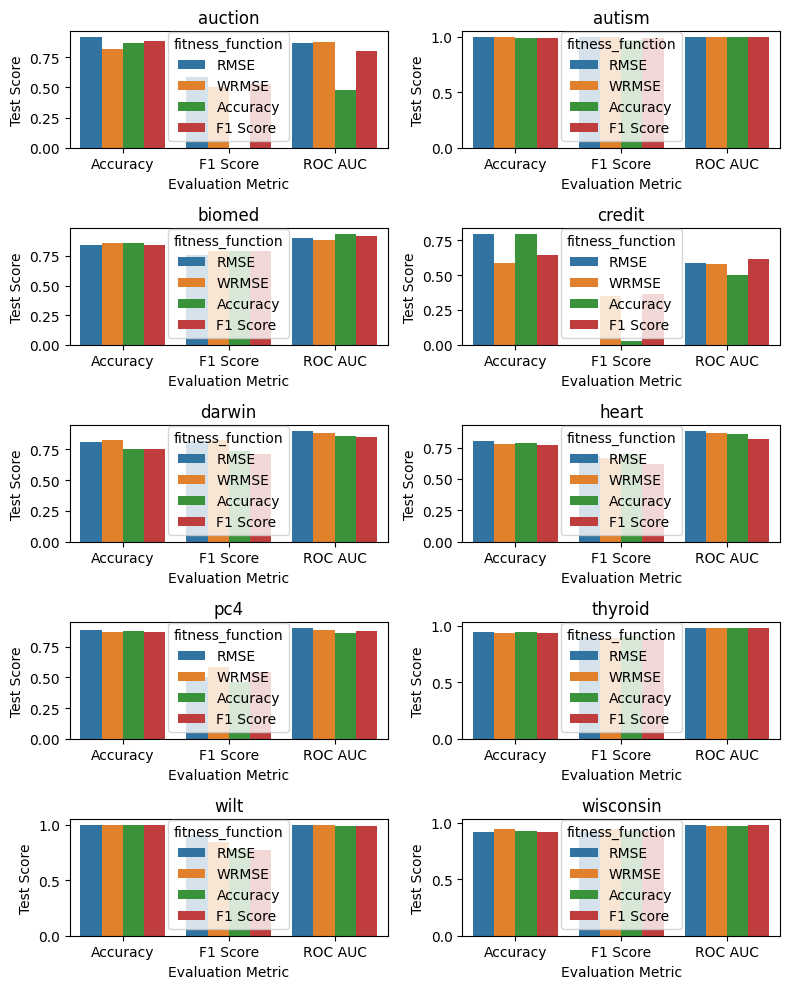

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Melt the DataFrame to long format
df_long = best_median.melt(
    id_vars=['dataset_name', 'fitness_function'],
    value_vars=[ 'test.accuracy', 'test.f1_score', 'test.roc_auc'],
    var_name='metric',
    value_name='value'
)

datasets = df_long['dataset_name'].unique()
df_long['metric'].replace({'test.accuracy': 'Accuracy',
                        'test.f1_score': 'F1 Score',
                        'test.roc_auc': 'ROC AUC'}, inplace=True)
df_long['fitness_function'].replace({'sigmoid_rmse': 'RMSE',
                                     'weighted_sigmoid_rmse': 'WRMSE',
                                    'accuracy': 'Accuracy',
                                    'f1_score': 'F1 Score'}, inplace=True)
# Layout: 2 plots per row
n_cols = 2
n_rows = math.ceil(len(datasets) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 2 * n_rows), squeeze=False)

# Plot each dataset
for idx, dataset in enumerate(datasets):
    i, j = divmod(idx, n_cols)
    ax = axes[i, j]
    
    subset = df_long[df_long['dataset_name'] == dataset]
    
    sns.barplot(
        data=subset,
        x='metric',
        y='value',
        hue='fitness_function',
        ax=ax
    )
    
    ax.set_title(dataset)
    ax.set_xlabel("Evaluation Metric")
    ax.set_ylabel("Test Score")
    ax.tick_params(axis='x')

# Hide empty subplots if total plots < n_rows * n_cols
for k in range(len(datasets), n_rows * n_cols):
    i, j = divmod(k, n_cols)
    fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
wtl = []
for dataset in best['dataset_name'].unique():
    subset = best[best['dataset_name'] == dataset]
    
    for config_id in subset['config_id'].unique():       
        
        
        for metric in ['test.accuracy', 'test.f1_score', 'test.roc_auc']:
            wins = 0
            ties = 0
            losses = 0
            for config_id2 in list( set(subset['config_id'].unique()) - set([config_id])):
                print()
                print(config_id, config_id2, metric)
                print(len(performance1), len(performance2))
                performance1 = subset[subset['config_id'] == config_id][metric].values
                performance2 = subset[subset['config_id'] == config_id2][metric].values
                
                if np.all(performance1 == performance2):
                    p_value = 1.0
                
                else:
                    p_value = stats.wilcoxon(performance1, performance2).pvalue

                if p_value >= 0.05:
                    ties += 1
                    
                else:
                    if performance1.median() > performance2.median():
                        wins += 1
                    else:
                        losses += 1
            wtl.append([dataset, config_id, metric, wins, ties, losses])
                    
wtl_df = pd.DataFrame(wtl, columns=['dataset_name', 'config_id', 'metric', 'wins', 'ties', 'losses'])       
        


1 9 test.accuracy
5 5

1 19 test.accuracy
5 5

1 5 test.accuracy
5 5

1 9 test.f1_score
5 5

1 19 test.f1_score
5 5

1 5 test.f1_score
5 5

1 9 test.roc_auc
5 5

1 19 test.roc_auc
5 5

1 5 test.roc_auc
5 5

5 1 test.accuracy
5 5

5 19 test.accuracy
5 5

5 9 test.accuracy
5 5

5 1 test.f1_score
5 5

5 19 test.f1_score
5 5

5 9 test.f1_score
5 5

5 1 test.roc_auc
5 5

5 19 test.roc_auc
5 5

5 9 test.roc_auc
5 5

9 1 test.accuracy
5 5

9 19 test.accuracy
5 5

9 5 test.accuracy
5 5

9 1 test.f1_score
5 5

9 19 test.f1_score
5 5

9 5 test.f1_score
5 5

9 1 test.roc_auc
5 5

9 19 test.roc_auc
5 5

9 5 test.roc_auc
5 5

19 1 test.accuracy
5 5

19 5 test.accuracy
5 5

19 9 test.accuracy
5 5

19 1 test.f1_score
5 5

19 5 test.f1_score
5 5

19 9 test.f1_score
5 5

19 1 test.roc_auc
5 5

19 5 test.roc_auc
5 5

19 9 test.roc_auc
5 5

1 9 test.accuracy
5 5

1 19 test.accuracy
5 5

1 5 test.accuracy
5 5

1 9 test.f1_score
5 5

1 19 test.f1_score
5 5

1 5 test.f1_score
5 5

1 9 test.roc_auc
5 5

1 1

c:\Users\leond\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\leond\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")



10 6 test.accuracy
5 5

10 2 test.f1_score
5 5

10 20 test.f1_score
5 5

10 6 test.f1_score
5 5

10 2 test.roc_auc
5 5

10 20 test.roc_auc
5 5

10 6 test.roc_auc
5 5

20 2 test.accuracy
5 5

20 10 test.accuracy
5 5

20 6 test.accuracy
5 5

20 2 test.f1_score
5 5

20 10 test.f1_score
5 5

20 6 test.f1_score
5 5

20 2 test.roc_auc
5 5

20 10 test.roc_auc
5 5

20 6 test.roc_auc
5 5

2 8 test.accuracy
5 5

2 19 test.accuracy
5 5

2 12 test.accuracy
5 5

2 8 test.f1_score
5 5

2 19 test.f1_score
5 5

2 12 test.f1_score
5 5

2 8 test.roc_auc
5 5

2 19 test.roc_auc
5 5

2 12 test.roc_auc
5 5

8 2 test.accuracy
5 5

8 19 test.accuracy
5 5

8 12 test.accuracy
5 5

8 2 test.f1_score
5 5

8 19 test.f1_score
5 5

8 12 test.f1_score
5 5

8 2 test.roc_auc
5 5

8 19 test.roc_auc
5 5

8 12 test.roc_auc
5 5

12 8 test.accuracy
5 5

12 2 test.accuracy
5 5

12 19 test.accuracy
5 5

12 8 test.f1_score
5 5

12 2 test.f1_score
5 5

12 19 test.f1_score
5 5

12 8 test.roc_auc
5 5

12 2 test.roc_auc
5 5

12 1

In [ ]:
wtl_df 

,dataset_name,config_id,metric,wins,ties,losses
0,biomed,1,test.accuracy,0,3,0
1,biomed,1,test.f1_score,0,3,0
2,biomed,1,test.roc_auc,0,3,0
3,biomed,5,test.accuracy,0,3,0
4,biomed,5,test.f1_score,0,3,0
...,...,...,...,...,...,...
115,thyroid,11,test.f1_score,0,3,0
116,thyroid,11,test.roc_auc,0,3,0
117,thyroid,18,test.accuracy,0,3,0
118,thyroid,18,test.f1_score,0,3,0


In [ ]:
wtl_df = pd.merge(wtl_df, ana.results[['dataset_name', 'config_id', 'config.fitness_function']].drop_duplicates().reset_index(), 
                  on=['dataset_name', 'config_id'], how='left')
wtl_df

,dataset_name,config_id,metric,wins,ties,losses,index,config.fitness_function
0,biomed,1,test.accuracy,0,3,0,10,sigmoid_rmse
1,biomed,1,test.f1_score,0,3,0,10,sigmoid_rmse
2,biomed,1,test.roc_auc,0,3,0,10,sigmoid_rmse
3,biomed,5,test.accuracy,0,3,0,210,weighted_sigmoid_rmse
4,biomed,5,test.f1_score,0,3,0,210,weighted_sigmoid_rmse
...,...,...,...,...,...,...,...,...
115,thyroid,11,test.f1_score,0,3,0,535,accuracy
116,thyroid,11,test.roc_auc,0,3,0,535,accuracy
117,thyroid,18,test.accuracy,0,3,0,885,f1_score
118,thyroid,18,test.f1_score,0,3,0,885,f1_score


In [ ]:
wtl_fin = wtl_df.groupby(['config.fitness_function', 'metric'])[['wins', 'ties', 'losses']].sum().reset_index()
wtl_fin['evaluation'] = wtl_fin['wins'] + 0.5* wtl_fin['ties'] 
wtl_fin

,config.fitness_function,metric,wins,ties,losses,evaluation
0,accuracy,test.accuracy,0,30,0,15.0
1,accuracy,test.f1_score,0,30,0,15.0
2,accuracy,test.roc_auc,0,30,0,15.0
3,f1_score,test.accuracy,0,30,0,15.0
4,f1_score,test.f1_score,0,30,0,15.0
5,f1_score,test.roc_auc,0,30,0,15.0
6,sigmoid_rmse,test.accuracy,0,30,0,15.0
7,sigmoid_rmse,test.f1_score,0,30,0,15.0
8,sigmoid_rmse,test.roc_auc,0,30,0,15.0
9,weighted_sigmoid_rmse,test.accuracy,0,30,0,15.0


In [ ]:
# Combine wins, ties, and losses into a single column
wtl_fin['result'] = wtl_fin.apply(lambda row: f"{row['wins']}/{row['ties']}/{row['losses']}", axis=1)

# Drop the individual columns for wins, ties, and losses
df_combined = wtl_fin.drop(columns=['wins', 'ties', 'losses'])

# Pivot the table to have the fitness function as index and metrics as columns
df_pivot = df_combined.pivot(index='config.fitness_function', columns='metric', values='result')

# Optional: Reset index if you want the fitness function as a regular column
df_pivot.reset_index(inplace=True)

df_pivot.set_index('config.fitness_function', inplace=True)
df_pivot



metric,test.accuracy,test.f1_score,test.roc_auc
config.fitness_function,,,
accuracy,0/30/0,0/30/0,0/30/0
f1_score,0/30/0,0/30/0,0/30/0
sigmoid_rmse,0/30/0,0/30/0,0/30/0
weighted_sigmoid_rmse,0/30/0,0/30/0,0/30/0


In [ ]:
best

,config_id,run_id,nodes_count,name,oversampling,config.pop_size,config.n_iter,config.elitism,config.n_elites,config.init_depth,...,train.recall,test.rmse,test.accuracy,test.roc_auc,test.f1_score,test.precision,test.recall,dataset_name,config_settings,fitness_function
0,1,1,5505,GSGP,False,100,1000,True,1,6,...,0.923077,0.330493,0.888889,0.885870,0.837209,0.900000,0.782609,biomed,GSGP_fitnesssigmoid_rmse_ms0.1_,sigmoid_rmse
1,1,2,5517,GSGP,False,100,1000,True,1,6,...,0.961538,0.365684,0.841270,0.905435,0.761905,0.842105,0.695652,biomed,GSGP_fitnesssigmoid_rmse_ms0.1_,sigmoid_rmse
2,1,3,5585,GSGP,False,100,1000,True,1,6,...,0.961538,0.312199,0.888889,0.913043,0.829268,0.944444,0.739130,biomed,GSGP_fitnesssigmoid_rmse_ms0.1_,sigmoid_rmse
3,1,4,5535,GSGP,False,100,1000,True,1,6,...,0.865385,0.377797,0.809524,0.860870,0.727273,0.761905,0.695652,biomed,GSGP_fitnesssigmoid_rmse_ms0.1_,sigmoid_rmse
4,1,5,5527,GSGP,False,100,1000,True,1,6,...,0.884615,0.333811,0.825397,0.904348,0.755556,0.772727,0.739130,biomed,GSGP_fitnesssigmoid_rmse_ms0.1_,sigmoid_rmse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,20,1,4549,GSGP,False,100,1000,True,1,6,...,1.000000,0.477379,0.773585,0.850427,0.760000,0.791667,0.730769,darwin,GSGP_fitnessf1_score_ms5.0_,f1_score
196,20,2,2135,GSGP,False,100,1000,True,1,6,...,0.983051,0.553423,0.660377,0.797721,0.678571,0.633333,0.730769,darwin,GSGP_fitnessf1_score_ms5.0_,f1_score
197,20,3,769,GSGP,False,100,1000,True,1,6,...,1.000000,0.463235,0.773585,0.871795,0.714286,0.937500,0.576923,darwin,GSGP_fitnessf1_score_ms5.0_,f1_score
198,20,4,4317,GSGP,False,100,1000,True,1,6,...,1.000000,0.467484,0.754717,0.887464,0.734694,0.782609,0.692308,darwin,GSGP_fitnessf1_score_ms5.0_,f1_score


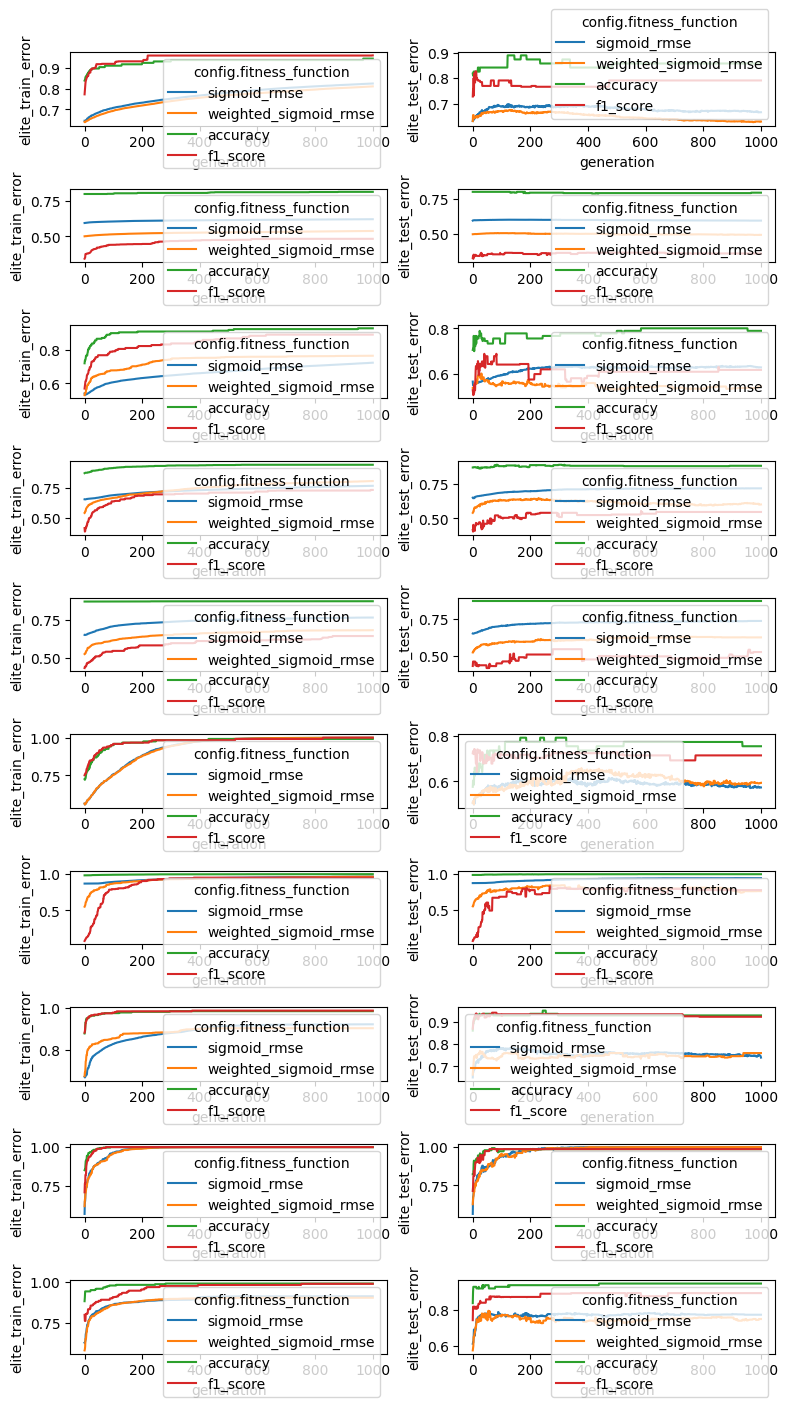

In [ ]:
unique_datasets = best['dataset_name'].unique()
fig, ax = plt.subplots(len(unique_datasets), 2, figsize=(8, 14), squeeze=False)
for i, dataset in enumerate(unique_datasets):
    subset = ana.logs[
    (ana.logs['dataset'] == dataset) & 
    (ana.logs['config_id'].isin(
        best_median[best_median['dataset_name'] == dataset]['config_id'].unique()
    ))
    ]
    


    grouped = subset.groupby(['config_id', 'generation'])[['elite_test_error', 'elite_train_error', 'elite_nodes']].median().reset_index()
    grouped = pd.merge(grouped, ana.results[['config_id', 'config.fitness_function']].drop_duplicates(), on='config_id', how='left')
    
    grouped.loc[grouped['config.fitness_function'].isin(['sigmoid_rmse', 'weighted_sigmoid_rmse']), 
            ['elite_test_error', 'elite_train_error']] = 1 - grouped[['elite_test_error', 'elite_train_error']]
    sns.lineplot(
        data=grouped,
        x='generation',
        y='elite_train_error',
        hue='config.fitness_function',
        ax = ax[i, 0],
    )
    
    sns.lineplot(
        data=grouped,
        x='generation',
        y='elite_test_error',
        hue='config.fitness_function',
        ax = ax[i, 1],
    )

fig.tight_layout() 
plt.show()

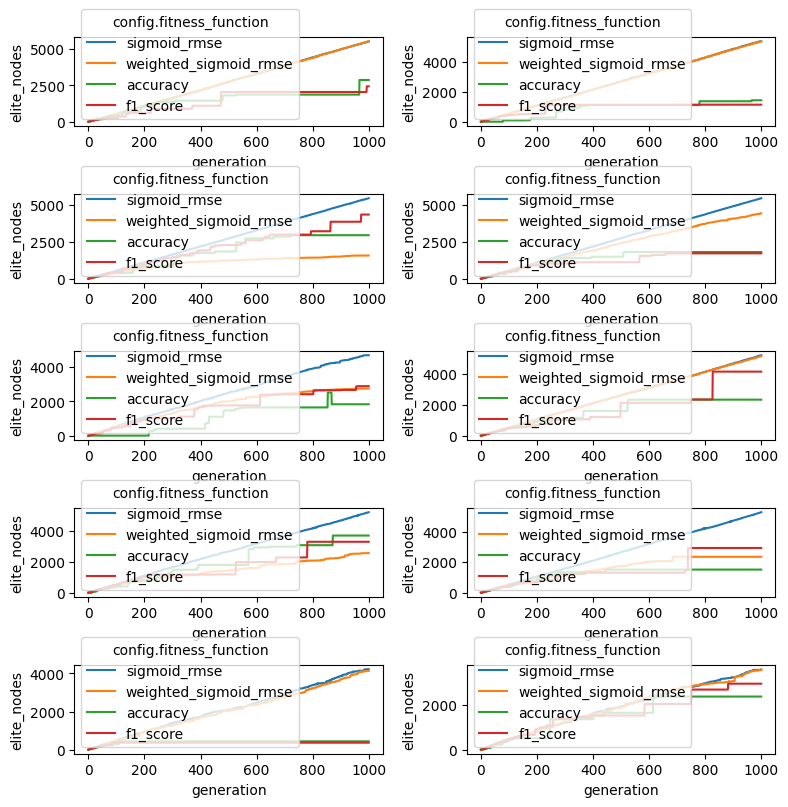

In [ ]:
unique_datasets = best['dataset_name'].unique()
fig, ax = plt.subplots(int(len(unique_datasets)/2), 2, figsize=(8, 8), squeeze=False)

j = 0
i = 0
for dataset in unique_datasets:

    subset = ana.logs[
    (ana.logs['dataset'] == dataset) & 
    (ana.logs['config_id'].isin(
        best_median[best_median['dataset_name'] == dataset]['config_id'].unique()
    ))
    ]
    
    grouped = subset.groupby(['config_id', 'generation'])[['elite_test_error', 'elite_train_error', 'elite_nodes']].median().reset_index()
    grouped = pd.merge(grouped, ana.results[['config_id', 'config.fitness_function']].drop_duplicates(), on='config_id', how='left')
    
    grouped.loc[grouped['config.fitness_function'].isin(['sigmoid_rmse', 'weighted_sigmoid_rmse']), 
            ['elite_test_error', 'elite_train_error']] = 1 - grouped[['elite_test_error', 'elite_train_error']]
    sns.lineplot(
        data=grouped,
        x='generation',
        y='elite_nodes',
        hue='config.fitness_function',
        ax = ax[i, j],
    )
    
    
    j = (j + 1) % 2
    i = i +1 if j == 0 else i

fig.tight_layout()
plt.show()

In [ ]:
ana.results.groupby(['dataset_name', 'config_settings', 'run_id'])['test.rmse'].median().unstack().median(axis=1).sort_values(ascending=False).unstack()

config_settings,GSGP_ffaccuracy_ms0.1_,GSGP_ffaccuracy_ms0.5_,GSGP_ffaccuracy_ms1.0_,GSGP_ffaccuracy_ms5.0_,GSGP_fff1_score_ms0.1_,GSGP_fff1_score_ms0.5_,GSGP_fff1_score_ms1.0_,GSGP_fff1_score_ms5.0_,GSGP_ffroc_auc_ms0.1_,GSGP_ffroc_auc_ms0.5_,GSGP_ffroc_auc_ms1.0_,GSGP_ffroc_auc_ms5.0_,GSGP_ffsigmoid_rmse_ms0.1_,GSGP_ffsigmoid_rmse_ms0.5_,GSGP_ffsigmoid_rmse_ms1.0_,GSGP_ffsigmoid_rmse_ms5.0_,GSGP_ffweighted_sigmoid_rmse_ms0.1_,GSGP_ffweighted_sigmoid_rmse_ms0.5_,GSGP_ffweighted_sigmoid_rmse_ms1.0_,GSGP_ffweighted_sigmoid_rmse_ms5.0_
dataset_name,,,,,,,,,,,,,,,,,,,,
auction,0.358679,0.327559,0.288826,0.297803,0.460039,0.406220,0.400577,0.332027,0.408769,0.620143,0.356260,0.351859,0.274125,0.263342,0.266518,0.283358,0.419787,0.348988,0.358194,0.445522
autism,0.316980,0.278537,0.224129,0.096538,0.376458,0.303555,0.234873,0.116132,0.478918,0.478918,0.525739,0.562274,0.118568,0.006286,0.000532,0.000001,0.127935,0.008381,0.000632,0.000002
biomed,0.334244,0.330214,0.362625,0.381742,0.335029,0.341562,0.330510,0.384799,0.398974,0.409438,0.401538,0.421293,0.333811,0.382650,0.373907,0.360794,0.348559,0.380352,0.352168,0.374733
credit,0.473315,0.424001,0.424361,0.442998,0.503559,0.473469,0.467227,0.535569,0.541981,0.748370,0.805687,0.893192,0.404364,0.410508,0.413985,0.406418,0.488165,0.498218,0.498881,0.495413
darwin,0.443101,0.415966,0.449354,0.505037,0.431186,0.425207,0.465132,0.477379,0.474056,0.653964,0.464429,0.545470,0.338804,0.427202,0.438554,0.468726,0.342613,0.407100,0.408428,0.407103
heart,0.446061,0.386211,0.411790,0.440238,0.427917,0.396699,0.388768,0.454718,0.450983,0.537648,0.567646,0.741696,0.370740,0.428626,0.456102,0.437512,0.360889,0.397858,0.416078,0.407508
pc4,0.360797,0.304674,0.305011,0.326674,0.417590,0.310289,0.317055,0.338359,0.531865,0.679873,0.726223,0.739535,0.282017,0.292715,0.317419,0.288923,0.346282,0.321706,0.333546,0.371077
thyroid,0.432988,0.302526,0.247628,0.215007,0.442732,0.304581,0.258580,0.240941,0.394086,0.326110,0.497796,0.458028,0.193861,0.195290,0.200908,0.227971,0.202050,0.230945,0.197619,0.219218
wilt,0.405775,0.201795,0.105056,0.077362,NaN,NaN,NaN,NaN,0.574112,NaN,NaN,NaN,0.088287,0.061120,0.063762,0.065851,0.189387,0.091554,0.082661,0.071644


In [ ]:
import pandas as pd
import re

def reshape_df(df):
    # Drop or reset index so 'dataset_name' is a column
    df = df.reset_index()

    # Extract all relevant columns
    config_cols = df.columns.difference(['dataset_name'])

    # Build MultiIndex from column names
    new_cols = []
    for col in config_cols:
        match = re.match(r'(.+)_fitness([\w]+)_ms([\d.]+)_', col)
        if match:
            name, p_inflate, ms_upper = match.groups()
            new_cols.append((name, p_inflate, float(ms_upper)))
        else:
            raise ValueError(f"Column format unexpected: {col}")

    # Reassign MultiIndex to the config columns
    df_configs = df[config_cols]
    df_configs.columns = pd.MultiIndex.from_tuples(new_cols, names=["name", "ff", "ms_upper"])

    # Add the dataset_name back as an index or column
    df_configs.insert(0, 'dataset_name', df['dataset_name'])

    # Set index if needed
    df_configs.set_index('dataset_name', inplace=True)

    return df_configs

reshape_df(ana.results.groupby(['dataset_name', 'config_settings', 'run_id'])['test.rmse'].median().unstack().median(axis=1).sort_values(ascending=False).unstack())

name              GSGP                                                    \
ff            accuracy                                f1_score             
ms_upper           0.1       0.5       1.0       5.0       0.1       0.5   
dataset_name                                                               
auction       0.358679  0.327559  0.288826  0.297803  0.460039  0.406220   
autism        0.316980  0.278537  0.224129  0.096538  0.376458  0.303555   
biomed        0.334244  0.330214  0.362625  0.381742  0.335029  0.341562   
credit        0.473315  0.424001  0.424361  0.442998  0.503559  0.473469   
darwin        0.443101  0.415966  0.449354  0.505037  0.431186  0.425207   
heart         0.446061  0.386211  0.411790  0.440238  0.427917  0.396699   
pc4           0.360797  0.304674  0.305011  0.326674  0.417590  0.310289   
thyroid       0.432988  0.302526  0.247628  0.215007  0.442732  0.304581   
wilt          0.405775  0.201795  0.105056  0.077362  0.305631  0.155695   
wisconsin     0.356096  0.246704  0.230264  0.256133  0.326530  0.247632   

name                                                                         \
ff                               sigmoid_rmse                                 
ms_upper           1.0       5.0          0.1       0.5       1.0       5.0   
dataset_name                                                                  
auction       0.400577  0.332027     0.274125  0.263342  0.266518  0.283358   
autism        0.234873  0.116132     0.118568  0.006286  0.000532  0.000001   
biomed        0.330510  0.384799     0.333811  0.382650  0.373907  0.360794   
credit        0.467227  0.535569     0.404364  0.410508  0.413985  0.406418   
darwin        0.465132  0.477379     0.338804  0.427202  0.438554  0.468726   
heart         0.388768  0.454718     0.370740  0.428626  0.456102  0.437512   
pc4           0.317055  0.338359     0.282017  0.292715  0.317419  0.288923   
thyroid       0.258580  0.240941     0.193861  0.195290  0.200908  0.227971   
wilt          0.112243  0.079129     0.088287  0.061120  0.063762  0.065851   
wisconsin     0.258637  0.276590     0.222547  0.261275  0.266437  0.260291   

name                                                              
ff           weighted_sigmoid_rmse                                
ms_upper                       0.1       0.5       1.0       5.0  
dataset_name                                                      
auction                   0.419787  0.348988  0.358194  0.445522  
autism                    0.127935  0.008381  0.000632  0.000002  
biomed                    0.348559  0.380352  0.352168  0.374733  
credit                    0.488165  0.498218  0.498881  0.495413  
darwin                    0.342613  0.407100  0.408428  0.407103  
heart                     0.360889  0.397858  0.416078  0.407508  
pc4                       0.346282  0.321706  0.333546  0.371077  
thyroid                   0.202050  0.230945  0.197619  0.219218  
wilt                      0.189387  0.091554  0.082661  0.071644  
wisconsin                 0.259693  0.271558  0.249483  0.239934

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

def plot_by_p_inflate_with_ms(df_reshaped, metric_name='metric', colors_dict=None):
    # Convert wide MultiIndex df to long-form
    df_long = df_reshaped.stack(level=[0, 1, 2]).reset_index()
    df_long.columns = ['dataset_name', 'name', 'fitness', 'ms_upper', metric_name]

    # Sort values to ensure lines connect properly
    df_long = df_long.sort_values(by=['dataset_name', 'name', 'ms_upper', 'fitness'])

    # Get unique datasets for subplots
    unique_datasets = df_long['dataset_name'].unique()
    fig, ax = plt.subplots(int(len(unique_datasets) / 2) + len(unique_datasets) % 2, 2,
                           figsize=(12, 15), squeeze=False)

    i = j = 0
    for dataset in unique_datasets:
        data_subset = df_long[df_long['dataset_name'] == dataset]

        sns.lineplot(
            data=data_subset,
            x='ms_upper',
            y=metric_name,
            markers='o',
            hue='fitness',
            style='fitness',
            
            #dashes=True,
            #palette=colors_dict,
            ax=ax[i, j]
        )

        ax[i, j].set_title(f'{dataset}')
        ax[i, j].set_xlabel('ff')
        ax[i, j].set_ylabel(metric_name)
        ax[i, j].yaxis.set_major_locator(ticker.LinearLocator(5))
        if metric_name == 'nodes_count':
            ax[i, j].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x)}"))
        else:
            ax[i, j].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.3f}"))

        j = (j + 1) % 2
        i = i + 1 if j == 0 else i

    fig.tight_layout()
    plt.show()


C:\Users\leond\AppData\Local\Temp\ipykernel_37140\1129481534.py:23: UserWarning: 
The markers list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(
C:\Users\leond\AppData\Local\Temp\ipykernel_37140\1129481534.py:23: UserWarning: 
The markers list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(
C:\Users\leond\AppData\Local\Temp\ipykernel_37140\1129481534.py:23: UserWarning: 
The markers list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(
C:\Users\leond\AppData\Local\Temp\ipykernel_37140\1129481534.py:23: UserWarning: 
The markers list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(
C:\Users\leond\AppData\Local\Temp\ipykernel_37140\1129481534.py:23: UserWarning: 
The markers list has fewer values (1) than needed (4) and will cycle, whic

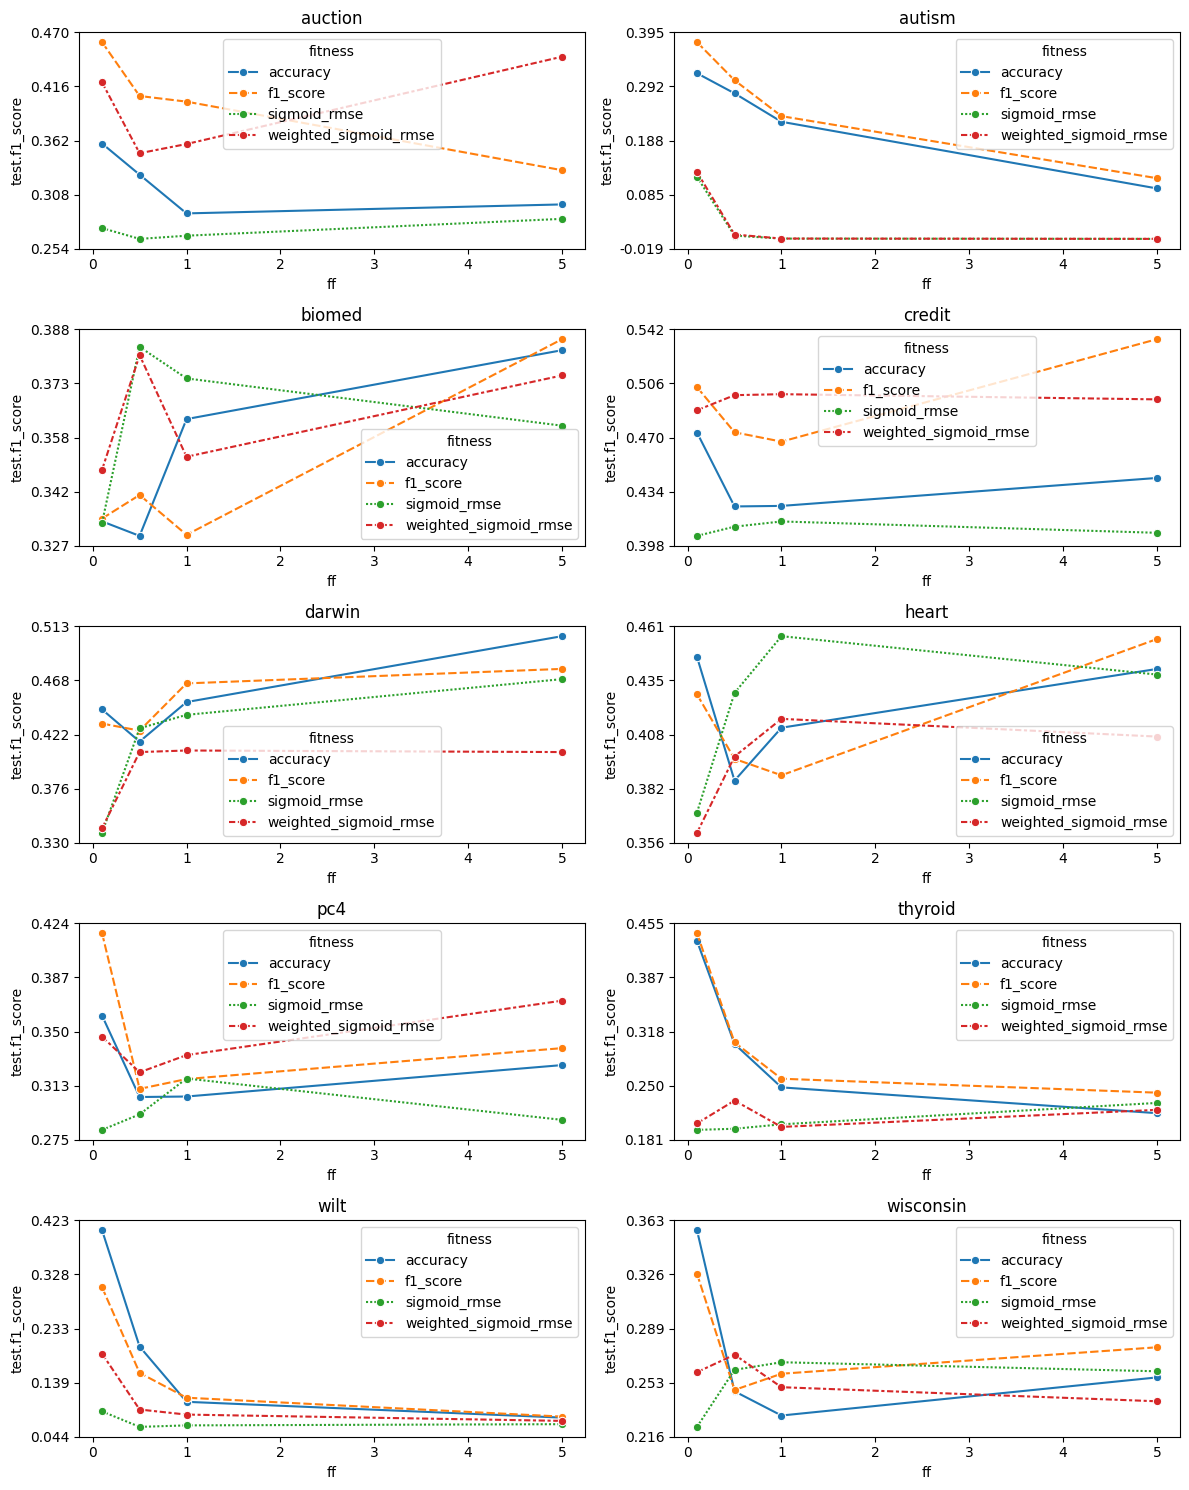

In [ ]:
plot_by_p_inflate_with_ms(reshape_df(ana.results.groupby(['dataset_name', 'config_settings', 'run_id'])['test.rmse'].median().unstack().median(axis=1).sort_values(ascending=False).unstack()), 'test.f1_score', colors_dict)

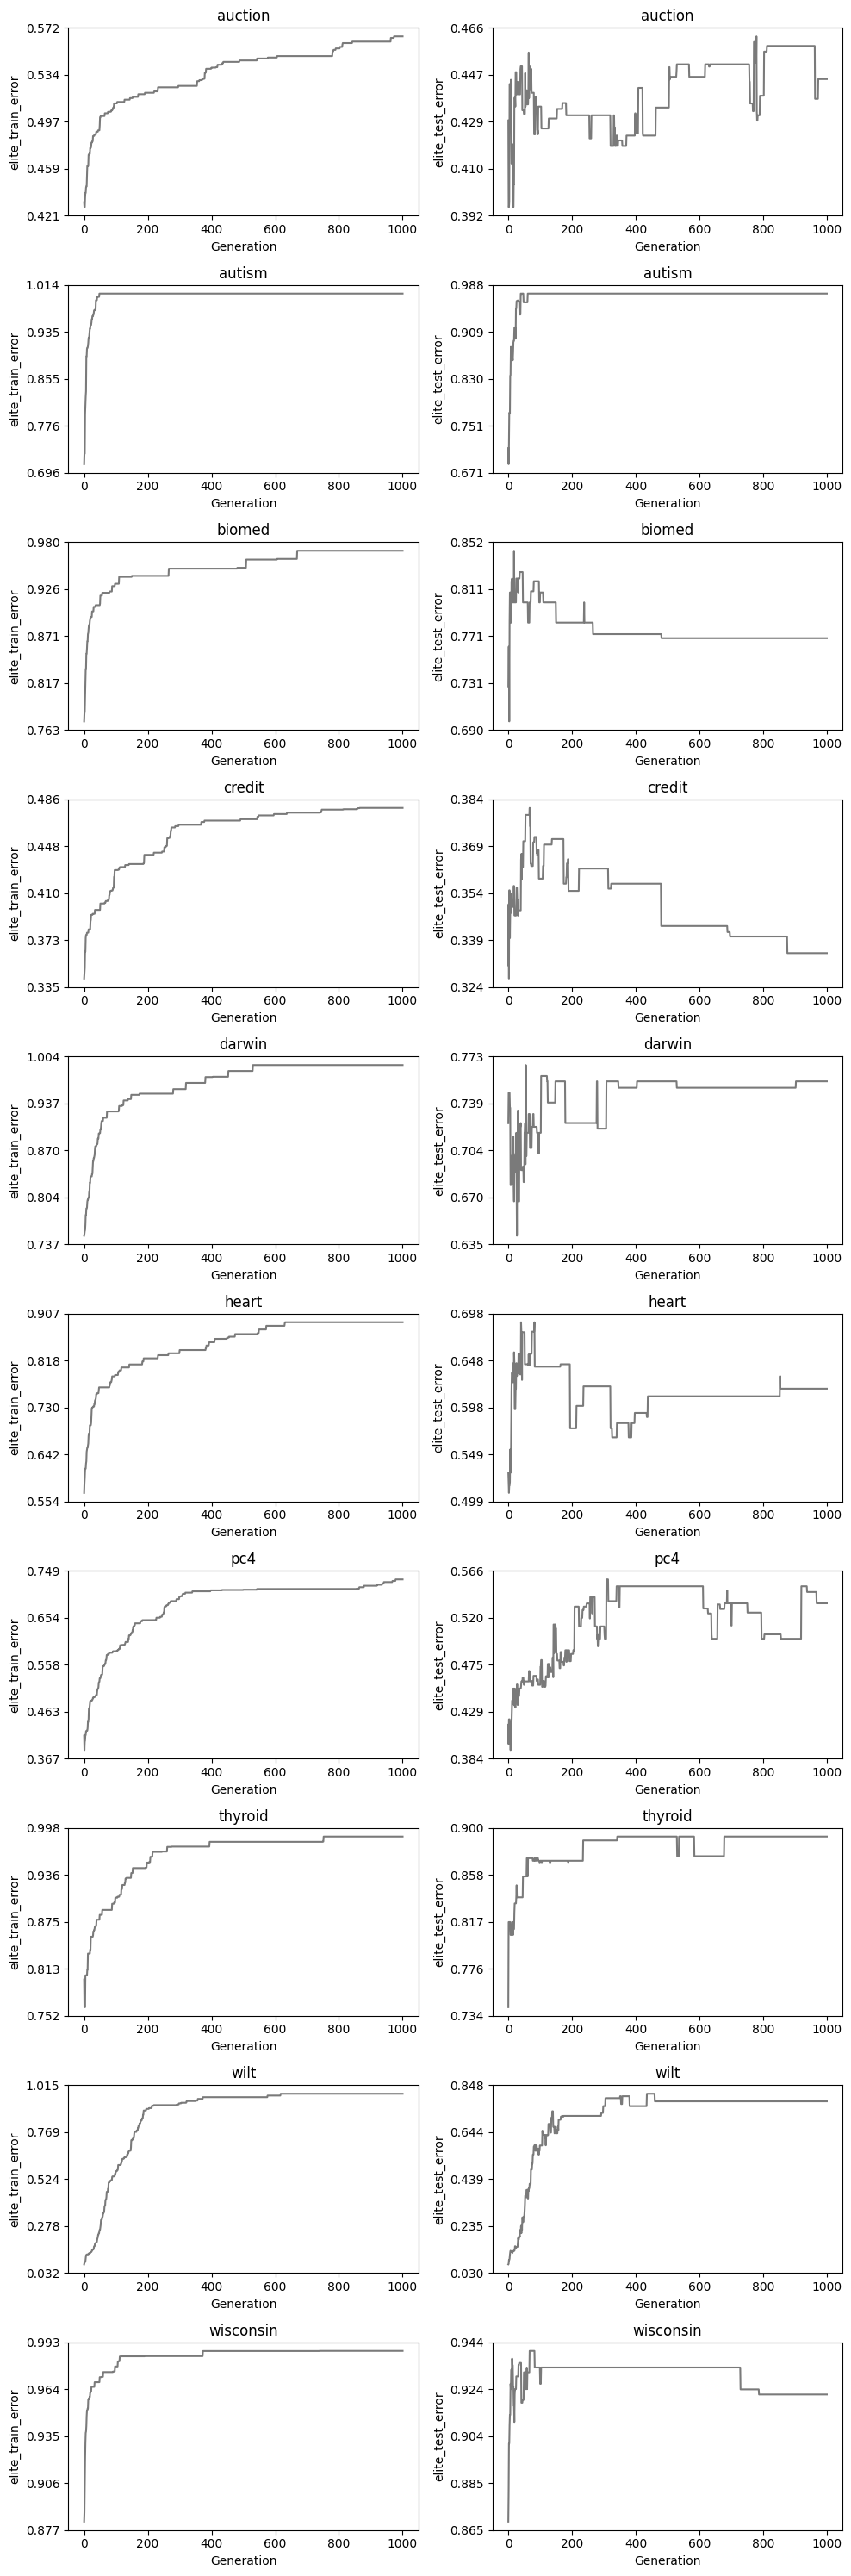

In [ ]:
error_evolution_plot(ana.logs[ana.logs['config_id'] == 18])

In [ ]:
ana.results[['config_id','config_settings']].drop_duplicates()

,config_id,config_settings
0,1,GSGP_fitnesssigmoid_rmse_ms0.1_
50,2,GSGP_fitnesssigmoid_rmse_ms0.5_
100,3,GSGP_fitnesssigmoid_rmse_ms1.0_
150,4,GSGP_fitnesssigmoid_rmse_ms5.0_
200,5,GSGP_fitnessweighted_sigmoid_rmse_ms0.1_
250,6,GSGP_fitnessweighted_sigmoid_rmse_ms0.5_
300,7,GSGP_fitnessweighted_sigmoid_rmse_ms1.0_
350,8,GSGP_fitnessweighted_sigmoid_rmse_ms5.0_
400,9,GSGP_fitnessaccuracy_ms0.1_
450,10,GSGP_fitnessaccuracy_ms0.5_


C:\Users\leond\AppData\Local\Temp\ipykernel_31136\1129481534.py:23: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(
C:\Users\leond\AppData\Local\Temp\ipykernel_31136\1129481534.py:23: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(
C:\Users\leond\AppData\Local\Temp\ipykernel_31136\1129481534.py:23: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(
C:\Users\leond\AppData\Local\Temp\ipykernel_31136\1129481534.py:23: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(
C:\Users\leond\AppData\Local\Temp\ipykernel_31136\1129481534.py:23: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, whic

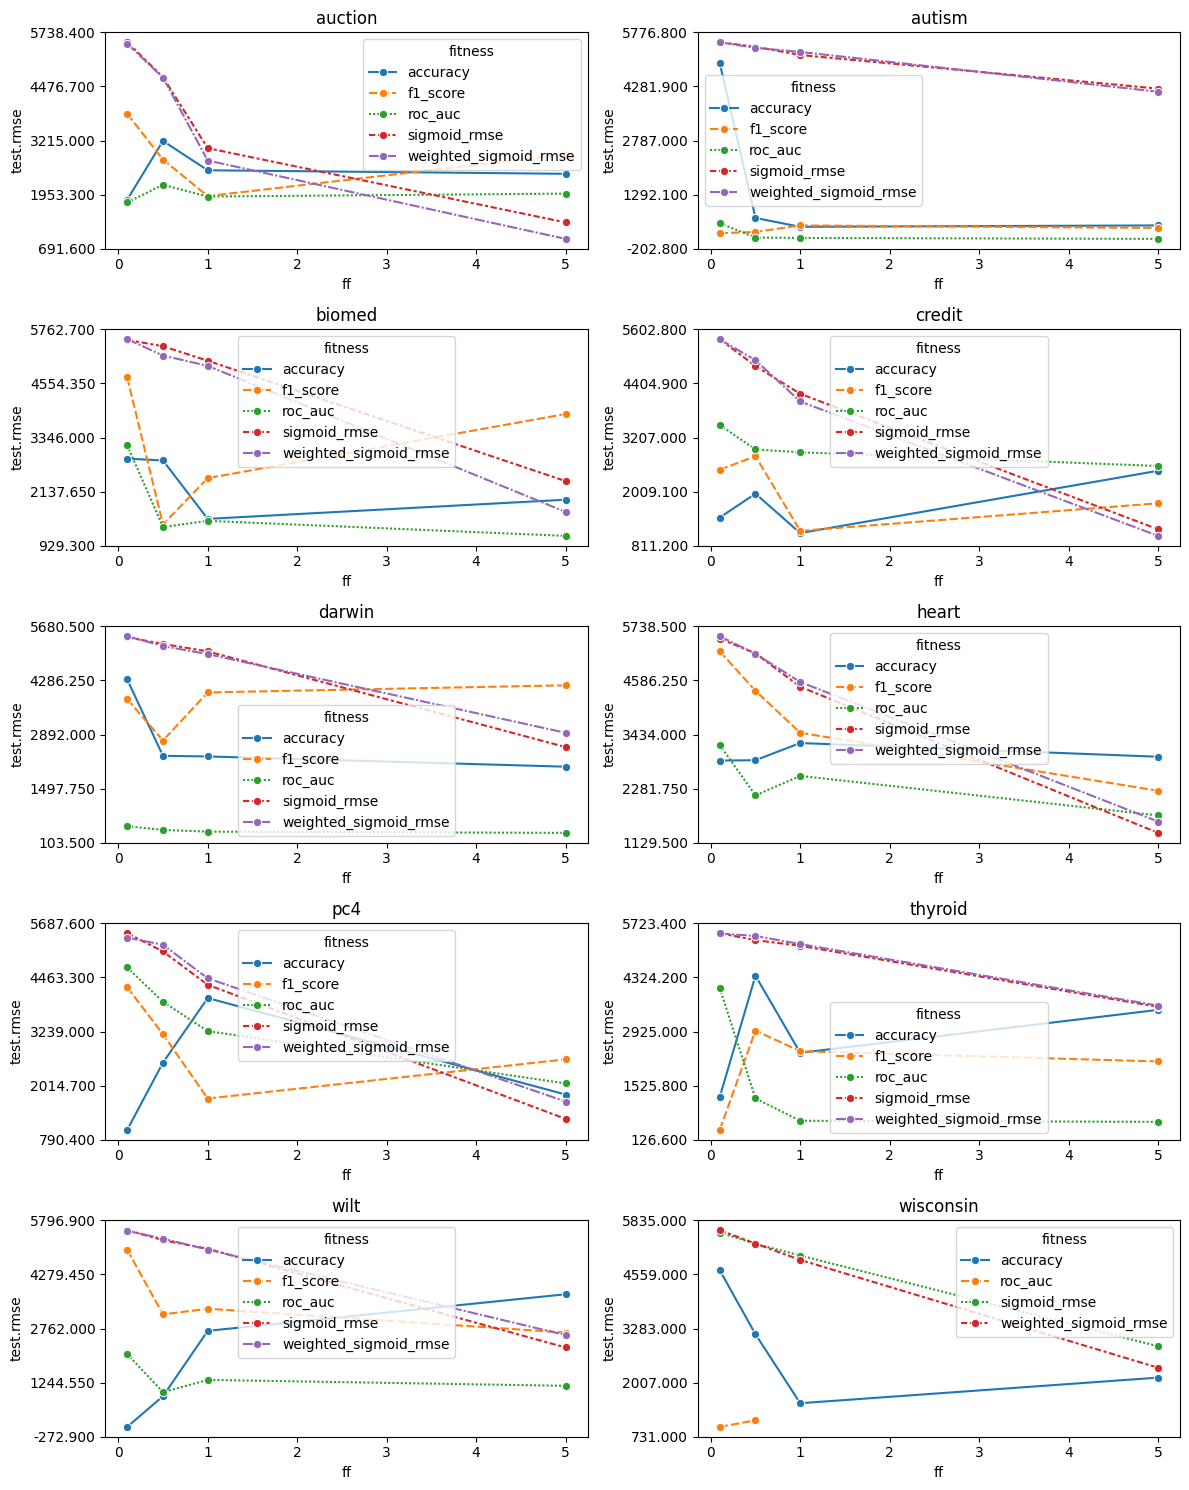

In [ ]:
plot_by_p_inflate_with_ms(reshape_df(ana.results.groupby(['dataset_name', 'config_settings', 'run_id'])['nodes_count'].median().unstack().median(axis=1).sort_values(ascending=False).unstack()), 'test.rmse', colors_dict)

In [ ]:
ana.results['config.ms_upper']

0       0.1
1       0.1
2       0.1
3       0.1
4       0.1
       ... 
1595    5.0
1596    5.0
1597    5.0
1598    5.0
1599    5.0
Name: config.ms_upper, Length: 1600, dtype: float64

In [ ]:
a = ana.results[['config_id', 'config.p_inflate', 'config.ms_upper', 'dataset_name', 'name']].drop_duplicates().reset_index(drop=True)
ana.logs['config_id'] = ana.logs['config_id'].astype(int)
df = pd.merge(
    ana.logs[['config_id', 'elite_nodes', 'generation']],
    a,
    on='config_id',
    how='right'
)

df['gen*p_inflate'] = df['config.p_inflate']  * df['generation']
df.drop(columns=['config_id'], inplace=True)
df = pd.get_dummies(df, columns=['dataset_name', 'name'], prefix='dataset', drop_first=True)

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
X = df.drop(columns=['elite_nodes', 'config.p_inflate', 'generation'])

y = df['elite_nodes']


lr = LinearRegression()
lr.fit(X, y)
print(r2_score(y, lr.predict(X)))
lr.coef_, lr.intercept_

0.7540696802366


(array([-1.11221482e+02,  6.75778400e+00, -2.38147002e-12, -2.35143849e-12,
        -2.31598074e-12, -2.37616871e-12, -2.35675368e-12, -2.34519348e-12,
        -2.34622044e-12, -2.35500508e-12, -2.35100828e-12, -6.48532698e+01]),
 127.96579076130251)

In [ ]:
X = ana.results[['config.p_inflate', 'config.ms_upper', 'dataset_name', 'name']]
X = pd.get_dummies(X, columns=['dataset_name', 'name'], prefix='dataset', drop_first=True)
y = ana.results['nodes_count']
lr = LinearRegression()
lr.fit(X, y)
r2_score(y, lr.predict(X))

0.773092758426989

In [ ]:
lr.coef_, lr.intercept_

(array([3718.96964286, -221.1308149 ,  505.3       , -140.4375    ,
          43.41875   ,  -20.55625   ,  254.4375    ,  -34.0125    ,
         287.1625    ,   68.83125   ,  449.0375    , -130.08625   ]),
 -147.57111970210258)

Median Test Errors (RMSE) Table

In [ ]:
get_aggregated_performance(ana.results, metric='nodes_count', agg='median')

config_settings,SLIM*SIG1_inflate0.1_ms0.1_,SLIM*SIG1_inflate0.1_ms0.5_,SLIM*SIG1_inflate0.1_ms1.0_,SLIM*SIG1_inflate0.1_ms5.0_,SLIM*SIG1_inflate0.3_ms0.1_,SLIM*SIG1_inflate0.3_ms0.5_,SLIM*SIG1_inflate0.3_ms1.0_,SLIM*SIG1_inflate0.3_ms5.0_,SLIM*SIG1_inflate0.5_ms0.1_,SLIM*SIG1_inflate0.5_ms0.5_,...,SLIM+SIG1_inflate0.3_ms1.0_,SLIM+SIG1_inflate0.3_ms5.0_,SLIM+SIG1_inflate0.5_ms0.1_,SLIM+SIG1_inflate0.5_ms0.5_,SLIM+SIG1_inflate0.5_ms1.0_,SLIM+SIG1_inflate0.5_ms5.0_,SLIM+SIG1_inflate0.9_ms0.1_,SLIM+SIG1_inflate0.9_ms0.5_,SLIM+SIG1_inflate0.9_ms1.0_,SLIM+SIG1_inflate0.9_ms5.0_
dataset_name,,,,,,,,,,,,,,,,,,,,,
auction,328.0,109.0,93.0,80.0,890.0,432.0,275.0,107.0,1540.0,955.0,...,307.0,146.0,2007.0,1258.0,664.0,227.0,4139.0,3423.0,2748.0,1392.0
autism,289.0,197.0,197.0,93.0,1060.0,873.0,713.0,319.0,2356.0,2061.0,...,678.0,269.0,2197.0,1952.0,1360.0,699.0,4176.0,3905.0,3695.0,2628.0
biomed,237.0,94.0,94.0,55.0,783.0,362.0,278.0,122.0,1592.0,836.0,...,280.0,148.0,1723.0,1027.0,772.0,355.0,3865.0,3501.0,3008.0,1724.0
caesarian,267.0,109.0,122.0,81.0,717.0,592.0,399.0,133.0,2147.0,1465.0,...,290.0,91.0,1864.0,1120.0,658.0,201.0,3827.0,3211.0,2352.0,986.0
credit,332.0,174.0,122.0,150.0,1008.0,605.0,434.0,265.0,1855.0,1051.0,...,317.0,185.0,1744.0,915.0,575.0,335.0,4013.0,2773.0,2188.0,843.0
darwin,733.0,276.0,211.0,81.0,1573.0,640.0,445.0,211.0,2059.0,1474.0,...,349.0,157.0,1545.0,1049.0,819.0,333.0,3954.0,3532.0,3282.0,2686.0
facebook,211.0,133.0,63.0,68.0,798.0,345.0,289.0,148.0,1802.0,995.0,...,425.0,148.0,2386.0,1343.0,920.0,251.0,4070.0,3511.0,3175.0,2408.0
landmines,373.0,224.0,256.0,96.0,1783.0,1181.0,776.0,202.0,3268.0,2344.0,...,282.0,124.0,1816.0,903.0,598.0,168.0,3840.0,2871.0,2256.0,685.0
student,312.0,124.0,85.0,57.0,813.0,395.0,280.0,98.0,1874.0,1053.0,...,376.0,108.0,2247.0,1350.0,572.0,278.0,4115.0,3450.0,2713.0,1354.0


P-Values for the ANOVA Test comparing the performance of different Inflation Rates for each SLIM-Version

In [ ]:
get_anova_table(ana.results, 'test.rmse')

name,SLIM*SIG1,SLIM+SIG1
dataset,,
auction,4.641983e-11,4.853233e-11
autism,4.469186e-01,2.082317e-09
biomed,5.533432e-01,5.984792e-03
caesarian,8.530047e-01,8.740171e-01
credit,7.080252e-01,4.317246e-01
darwin,5.585435e-01,7.505635e-03
facebook,4.322860e-01,9.710876e-01
landmines,2.080152e-10,1.438810e-04
student,2.425804e-01,1.589840e-05


P-Values when excluding the Corner Values [0.1, 0.9] from the ANOVA Test

In [ ]:
get_anova_table(ana.results.loc[ana.results['config.p_inflate'].isin([0.3, 0.5, 0.7])], 'test.rmse')

name,SLIM*SIG1,SLIM+SIG1
dataset,,
auction,0.001754,0.018330
autism,0.838818,0.109952
biomed,0.493315,0.139655
caesarian,0.943190,0.722714
credit,0.910465,0.754382
darwin,0.137366,0.717290
facebook,0.636660,0.694887
landmines,0.031395,0.158601
student,0.507252,0.080934


Countplot for the Sum of best achieved Performance for the different Inflation Rates accross Datasets

<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>

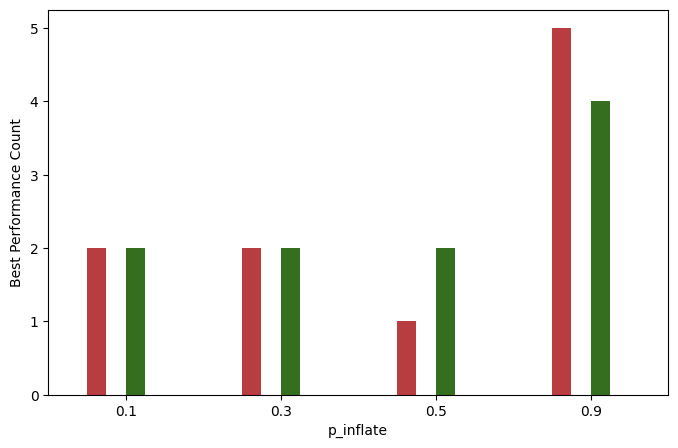

In [ ]:
plot_countplot(ana.results, 'test.rmse')

Visualization for the Median Tree Size of the Final Individual for different Inflation Rates

<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>

             SLIM*SIG1                                                     \
dataset_name   auction  autism  biomed caesarian  credit  darwin facebook   
0.1              328.0   289.0   237.0     267.0   332.0   733.0    211.0   
0.3              890.0  1060.0   783.0     717.0  1008.0  1573.0    798.0   
0.5             1540.0  2356.0  1592.0    2147.0  1855.0  2059.0   1802.0   
0.9             4592.0  4920.0  4227.0    4599.0  4481.0  4580.0   4421.0   

                                       SLIM+SIG1                            \
dataset_name landmines student thyroid   auction  autism  biomed caesarian   
0.1              373.0   312.0   460.0     109.0   197.0    94.0     109.0   
0.3             1783.0   813.0  1185.0     432.0   873.0   362.0     592.0   
0.5             3268.0  1874.0  2360.0     955.0  2061.0   836.0    1465.0   
0.9             5305.0  4661.0  4776.0    3052.0  4616.0  3539.0    4052.0   

                                                                 
da

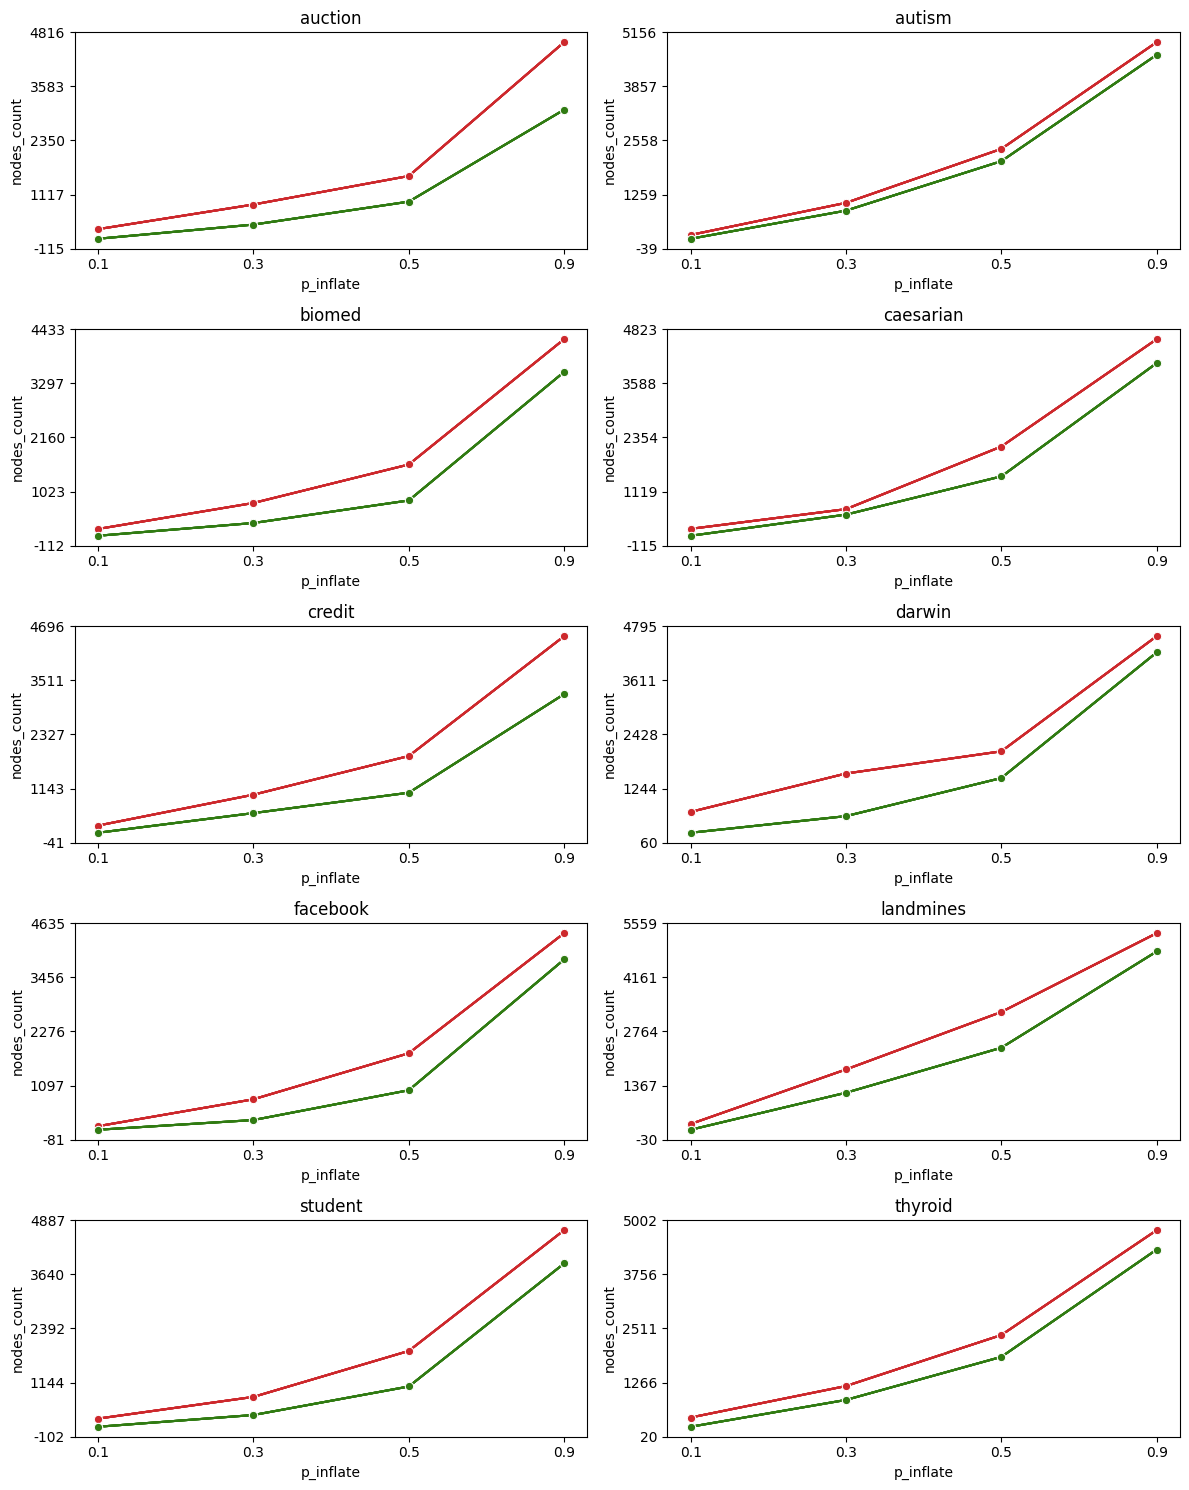

In [ ]:
plot_by_p_inflate(ana.results, 'nodes_count') #[ana.results['config.ms_upper']==5]

Median Tree Size Table

In [ ]:
get_aggregated_performance(ana.results, metric='nodes_count', agg='median')

config_settings,SLIM*SIG1_inflate0.1_ms0.1_,SLIM*SIG1_inflate0.1_ms0.5_,SLIM*SIG1_inflate0.1_ms1.0_,SLIM*SIG1_inflate0.1_ms5.0_,SLIM*SIG1_inflate0.3_ms0.1_,SLIM*SIG1_inflate0.3_ms0.5_,SLIM*SIG1_inflate0.3_ms1.0_,SLIM*SIG1_inflate0.3_ms5.0_,SLIM*SIG1_inflate0.5_ms0.1_,SLIM*SIG1_inflate0.5_ms0.5_,...,SLIM+SIG1_inflate0.3_ms1.0_,SLIM+SIG1_inflate0.3_ms5.0_,SLIM+SIG1_inflate0.5_ms0.1_,SLIM+SIG1_inflate0.5_ms0.5_,SLIM+SIG1_inflate0.5_ms1.0_,SLIM+SIG1_inflate0.5_ms5.0_,SLIM+SIG1_inflate0.9_ms0.1_,SLIM+SIG1_inflate0.9_ms0.5_,SLIM+SIG1_inflate0.9_ms1.0_,SLIM+SIG1_inflate0.9_ms5.0_
dataset_name,,,,,,,,,,,,,,,,,,,,,
auction,328.0,109.0,93.0,80.0,890.0,432.0,275.0,107.0,1540.0,955.0,...,307.0,146.0,2007.0,1258.0,664.0,227.0,4139.0,3423.0,2748.0,1392.0
autism,289.0,197.0,197.0,93.0,1060.0,873.0,713.0,319.0,2356.0,2061.0,...,678.0,269.0,2197.0,1952.0,1360.0,699.0,4176.0,3905.0,3695.0,2628.0
biomed,237.0,94.0,94.0,55.0,783.0,362.0,278.0,122.0,1592.0,836.0,...,280.0,148.0,1723.0,1027.0,772.0,355.0,3865.0,3501.0,3008.0,1724.0
caesarian,267.0,109.0,122.0,81.0,717.0,592.0,399.0,133.0,2147.0,1465.0,...,290.0,91.0,1864.0,1120.0,658.0,201.0,3827.0,3211.0,2352.0,986.0
credit,332.0,174.0,122.0,150.0,1008.0,605.0,434.0,265.0,1855.0,1051.0,...,317.0,185.0,1744.0,915.0,575.0,335.0,4013.0,2773.0,2188.0,843.0
darwin,733.0,276.0,211.0,81.0,1573.0,640.0,445.0,211.0,2059.0,1474.0,...,349.0,157.0,1545.0,1049.0,819.0,333.0,3954.0,3532.0,3282.0,2686.0
facebook,211.0,133.0,63.0,68.0,798.0,345.0,289.0,148.0,1802.0,995.0,...,425.0,148.0,2386.0,1343.0,920.0,251.0,4070.0,3511.0,3175.0,2408.0
landmines,373.0,224.0,256.0,96.0,1783.0,1181.0,776.0,202.0,3268.0,2344.0,...,282.0,124.0,1816.0,903.0,598.0,168.0,3840.0,2871.0,2256.0,685.0
student,312.0,124.0,85.0,57.0,813.0,395.0,280.0,98.0,1874.0,1053.0,...,376.0,108.0,2247.0,1350.0,572.0,278.0,4115.0,3450.0,2713.0,1354.0


P-Values for the ANOVA Test comparing the Tree Size of different Inflation Rates for each SLIM-Version

In [ ]:
get_anova_table(ana.results, 'nodes_count')

name,SLIM*SIG1,SLIM+SIG1
dataset,,
auction,5.979925e-18,1.082121e-22
autism,1.879692e-34,4.236451e-37
biomed,1.601541e-10,3.061488e-23
caesarian,2.959930e-17,4.916322e-19
credit,5.504761e-19,9.416238e-17
darwin,8.928884e-25,1.456714e-46
facebook,9.506388e-15,2.801172e-11
landmines,4.660608e-20,2.617964e-15
student,1.204075e-16,4.044322e-20


P-Values when excluding the Corner Value 0.1 from the ANOVA Test

In [ ]:
get_anova_table(ana.results.loc[ana.results['config.p_inflate'].isin([0.3, 0.5, 0.7])], 'nodes_count')

name,SLIM*SIG1,SLIM+SIG1
dataset,,
auction,0.014679,0.002033
autism,0.000001,0.000002
biomed,0.015151,0.003000
caesarian,0.000848,0.002219
credit,0.000782,0.008717
darwin,0.019247,0.000001
facebook,0.006183,0.063294
landmines,0.001234,0.008877
student,0.001197,0.007792
